In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import dates
from matplotlib.colors import LogNorm
from netCDF4 import num2date,date2num,Dataset
import matplotlib._pylab_helpers
#from joblib import Parallel, delayed
import scipy.interpolate as interpolate
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats.mstats import scoreatpercentile
import pyart
import os,subprocess,time,copy
import scipy
import math
import matplotlib.gridspec as gridspec
import cPickle as pickle
#import pickle
import pprint
import pyproj
import scipy.interpolate as interpolate
import datetime
from marcus_py_tools import make_edge_vec,latlon_from_xy,xy_from_latlon,walklevel
%matplotlib inline

##More KAZR moment testing/analysis
Specifically, to look at variations in V_left and compare to variations in V_mean. Are these quantities correlated? How well? do deviations from correlation occer in certain places?

In [4]:
#..Also plot raw KAZR moments...
filenm = '/home/mvanlier/mvanlier/kazr/kazr_ge_raw_mom_20110520_110000v2.nc'
nc = Dataset(filenm,'r')
time0 = nc.variables['KAZR_time_hour'][:]+nc.variables['KAZR_time_minute'][:]/60.+nc.variables['KAZR_time_second'][:]/3600.
zax0  = nc.variables['KAZR_range'][:]
vsig0 = nc.variables['KAZR_Vsig'][:,:]
vlft0 = nc.variables['KAZR_Vleft'][:,:]
vavg0 = nc.variables['KAZR_Vmean'][:,:]
nc.close()
#..
filenm = '/home/mvanlier/mvanlier/kazr/kazr_ge_raw_mom_20110520_120000v2.nc'
nc = Dataset(filenm,'r')
time1 = nc.variables['KAZR_time_hour'][:]+nc.variables['KAZR_time_minute'][:]/60.+nc.variables['KAZR_time_second'][:]/3600.
vsig1 = nc.variables['KAZR_Vsig'][:,:]
vlft1 = nc.variables['KAZR_Vleft'][:,:]
vavg1 = nc.variables['KAZR_Vmean'][:,:]
nc.close()
#..
filenm = '/home/mvanlier/mvanlier/kazr/kazr_ge_raw_mom_20110520_130000v2.nc'
nc = Dataset(filenm,'r')
time2 = nc.variables['KAZR_time_hour'][:]+nc.variables['KAZR_time_minute'][:]/60.+nc.variables['KAZR_time_second'][:]/3600.
vsig2 = nc.variables['KAZR_Vsig'][:,:]
vlft2 = nc.variables['KAZR_Vleft'][:,:]
vavg2 = nc.variables['KAZR_Vmean'][:,:]
nc.close()
#..
filenm = '/home/mvanlier/mvanlier/kazr/kazr_ge_raw_mom_20110520_140000v2.nc'
nc = Dataset(filenm,'r')
time3 = nc.variables['KAZR_time_hour'][:]+nc.variables['KAZR_time_minute'][:]/60.+nc.variables['KAZR_time_second'][:]/3600.
vsig3 = nc.variables['KAZR_Vsig'][:,:]
vlft3 = nc.variables['KAZR_Vleft'][:,:]
vavg3 = nc.variables['KAZR_Vmean'][:,:]
nc.close()
#..
filenm = '/home/mvanlier/mvanlier/kazr/kazr_ge_raw_mom_20110520_150000v2.nc'
nc = Dataset(filenm,'r')
time4 = nc.variables['KAZR_time_hour'][:]+nc.variables['KAZR_time_minute'][:]/60.+nc.variables['KAZR_time_second'][:]/3600.
vsig4 = nc.variables['KAZR_Vsig'][:,:]
vlft4 = nc.variables['KAZR_Vleft'][:,:]
vavg4 = nc.variables['KAZR_Vmean'][:,:]
nc.close()
#..
#..Concatenate vsig profiles together
vsig_all = np.concatenate((vsig0,vsig1,vsig2,vsig3,vsig4),axis=0)
#..Concatenate mean doppler velocity profiles together
vavg_all = np.concatenate((vavg0,vavg1,vavg2,vavg3,vavg4),axis=0)
vlft_all = np.concatenate((vlft0,vlft1,vlft2,vlft3,vlft4),axis=0)
#sgp_mdv_all = np.ma.masked_where(sgp_mdv_all<-5.,sgp_mdv_all)
time_all = np.r_[time0,time1,time2,time3,time4]

In [19]:
vsig_all = np.ma.masked_where(vsig_all<-98,vsig_all)
vavg_all = np.ma.masked_where(vavg_all<-98,vavg_all)
vlft_all = np.ma.masked_where(vlft_all<-98,vlft_all)

In [5]:
te_all = make_edge_vec(time_all)
ze_all = make_edge_vec(zax0)

(0.0, 11000.0)

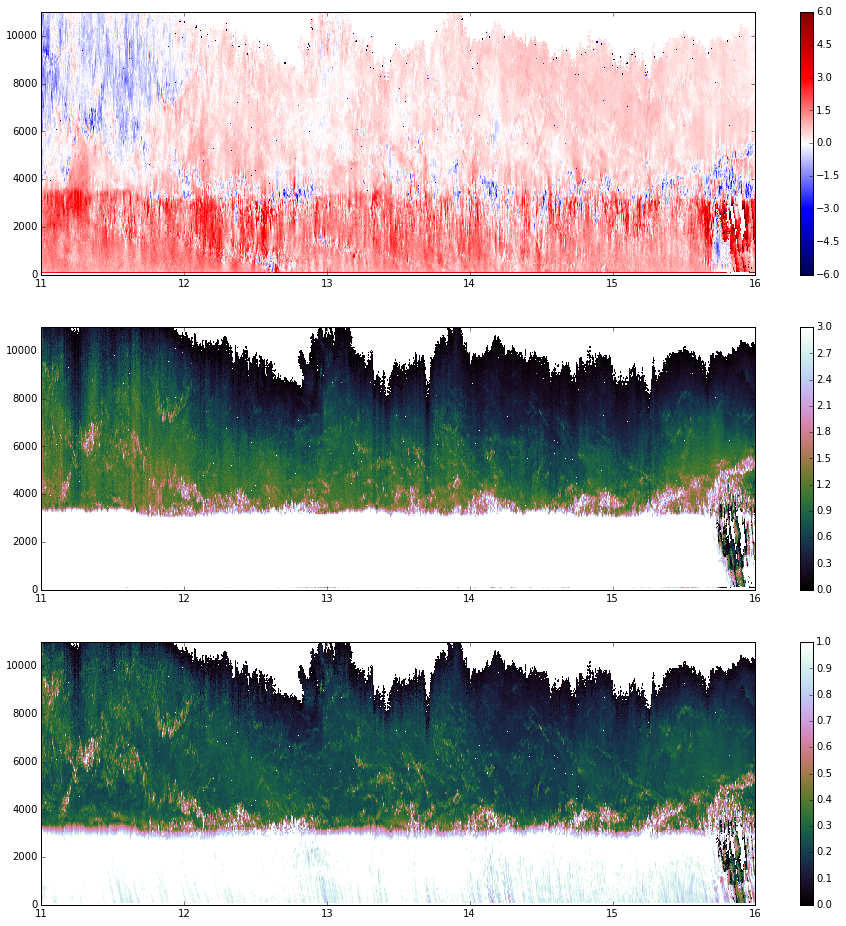

In [43]:
t_min = 11.
t_max = 16.
#..
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(311)
im1 = plt.pcolormesh(te_all,ze_all,vlft_all.T,vmin=-6.,vmax=6.,cmap=cm.seismic,rasterized=True)
plt.colorbar()
ax.set_xlim(t_min,t_max)
ax.set_ylim(0.,11000.)
#..
ax = fig.add_subplot(312)
im1 = plt.pcolormesh(te_all,ze_all,vavg_all.T-vlft_all.T,vmin=-0.,vmax=3.,cmap=cm.cubehelix,rasterized=True)
plt.colorbar()
ax.set_xlim(t_min,t_max)
ax.set_ylim(0.,11000.)
#..
ax = fig.add_subplot(313)
im1 = plt.pcolormesh(te_all,ze_all,vsig_all.T,vmin=0.,vmax=1.,cmap=cm.cubehelix,rasterized=True)
plt.colorbar()
ax.set_xlim(t_min,t_max)
ax.set_ylim(0.,11000.)

In [30]:
numb = 200
vsub_bins = np.linspace(0.,8,numb)
vsig_bins = np.linspace(0.,1.5,numb)
vavg_bins = np.linspace(-2.,10.,numb)
vlft_bins = np.linspace(-5.,5.,numb)

(0, 40000)

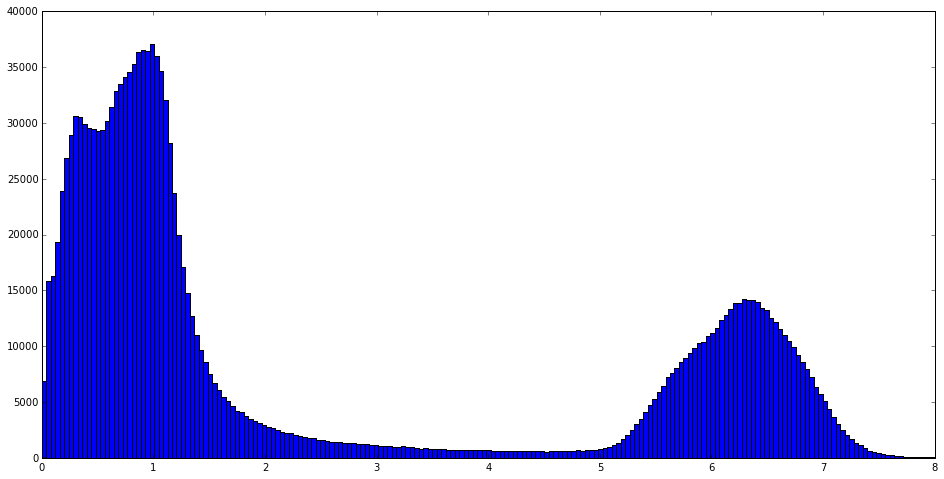

In [31]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
arrr = plt.hist(vavg_all.compressed()-vlft_all.compressed(),bins=vsub_bins)
ax.set_xlim(0,8)
ax.set_ylim(0,40000)

(0, 60000)

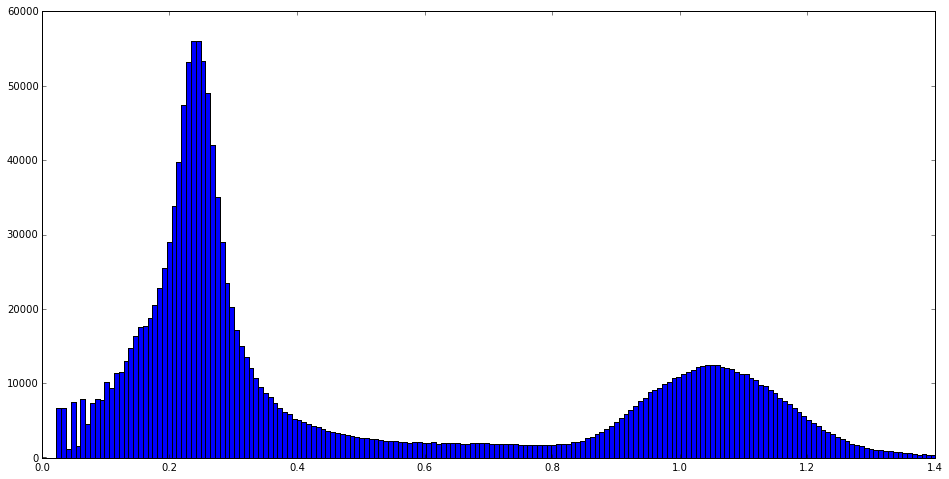

In [45]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
arrr = plt.hist(vsig_all.compressed(),bins=vsig_bins)
ax.set_xlim(0,1.4)
ax.set_ylim(0,60000)

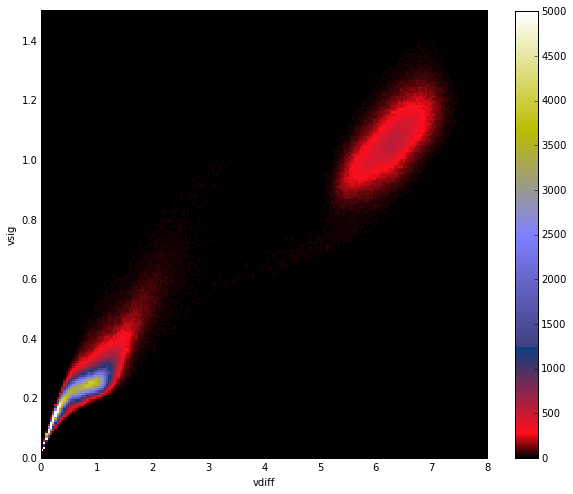

In [38]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
arrr = plt.hist2d(vavg_all.compressed()-vlft_all.compressed(),vsig_all.compressed(),bins=(vsub_bins,vsig_bins),
                  cmap=cm.gist_stern,vmin=0,vmax=5000.)
plt.colorbar()
ax.set_xlabel('vdiff')
ax.set_ylabel('vsig')

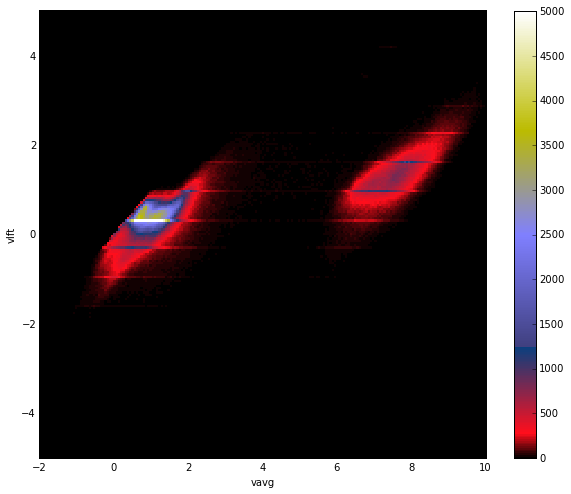

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
arrr = plt.hist2d(vavg_all.compressed(),vlft_all.compressed(),bins=(vavg_bins,vlft_bins),
                  cmap=cm.gist_stern,vmin=0,vmax=5000)
plt.colorbar()
ax.set_xlabel('vavg')
ax.set_ylabel('vlft')

(0, 80000)

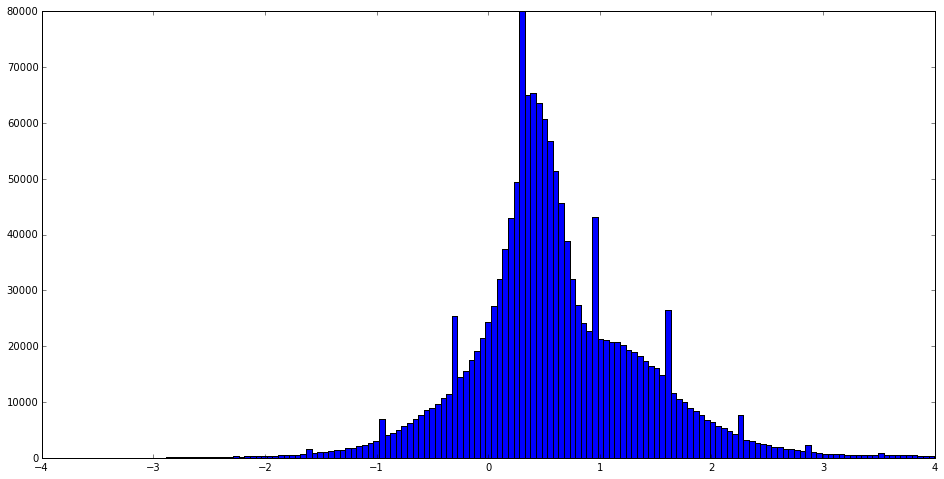

In [48]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
arrr = plt.hist(vlft_all.compressed(),bins=vlft_bins)
ax.set_xlim(-4,4)
ax.set_ylim(0,80000)

In [ ]:
#..Now let's look at the distribution of v_sub at different levels